# Statistical Significance

In [2]:
import sklearn
import numpy as np
import matplotlib
import pandas as pd
import sklearn
from platform import python_version

print("Python version:     ", python_version())
print("sklearn version:    ", sklearn.__version__)
print("numpy version:      ", np.__version__)
print("matplotlib version: ", matplotlib.__version__)
print("pandas version:     ", pd.__version__)
print("sklearn version:    ", sklearn.__version__)


Python version:      3.9.7
sklearn version:     1.1.2
numpy version:       1.20.3
matplotlib version:  3.4.3
pandas version:      1.3.4
sklearn version:     1.1.2


## 6.2 Null Hypothesis Statistical Testing
### 6.2.2 Comparing Two Classifiers on Multiple Domains
#### Table 6.1 Wilcoxon's Signed-Ranks Test

In [3]:
# Load BreastCancer Dataset
bc_link = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data"
bc_data = pd.read_csv(bc_link, header = None)
X = bc_data.iloc[:,2:33].to_numpy()

y= bc_data.iloc[:,1].to_numpy()

# Load Liver Dataset
liv_link = "https://archive.ics.uci.edu/ml/machine-learning-databases/liver-disorders/bupa.data"
liv_data = pd.read_csv(liv_link, header = None)
X_1 = liv_data.iloc[:,0:5].to_numpy()
y_1= liv_data.iloc[:,6].to_numpy()

# Load Balance Scale Dataset
balance_link = "https://archive.ics.uci.edu/ml/machine-learning-databases/balance-scale/balance-scale.data"
balance_data = pd.read_csv(balance_link, header=None)
X_2 = balance_data.iloc[:,1:4].to_numpy()
y_2= balance_data.iloc[:,0].to_numpy()

# Load Contact Lenses Dataset
contacts_link = "https://archive.ics.uci.edu/ml/machine-learning-databases/lenses/lenses.data"
contacts_data = pd.read_csv(contacts_link, header=None, delimiter=r"\s+")
X_3 = balance_data.iloc[:,2:5].astype("category").to_numpy()
y_3= balance_data.iloc[:,1].astype("category").to_numpy()

# Load Pima Diabetes Dataset
#diabetes_link = 
# The dataset is no longer available on UCI, permission restrictions were cited

# Glass Dataset
glass_link = "https://archive.ics.uci.edu/ml/machine-learning-databases/glass/glass.data"
glass_data = pd.read_csv(glass_link, header=None)

# Hepatitis Dataset
hepatitis_link = "https://archive.ics.uci.edu/ml/machine-learning-databases/hepatitis/hepatitis.data"
hepatitis_data = pd.read_csv(hepatitis_link, header=None)

# Hypothyroid Dataset
hypothyroid_link = "https://archive.ics.uci.edu/ml/machine-learning-databases/thyroid-disease/hypothyroid.data"
hypothyroid_data = pd.read_csv(hypothyroid_link, header=None)

# Load Anneal Dataset
anneal_link = "https://archive.ics.uci.edu/ml/machine-learning-databases/annealing/anneal.data"
anneal_data = pd.read_csv(anneal_link, header = None)
#X_2 = liv_data.iloc[:,0:5].to_numpy()
#y_2= liv_data.iloc[:,6].to_numpy()

In [4]:
contacts_data

,0,1,2,3,4,5
0,1,1,1,1,1,3
1,2,1,1,1,2,2
2,3,1,1,2,1,3
3,4,1,1,2,2,1
4,5,1,2,1,1,3
5,6,1,2,1,2,2
6,7,1,2,2,1,3
7,8,1,2,2,2,1
8,9,2,1,1,1,3
9,10,2,1,1,2,2


In [5]:
hypothyroid_data

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,hypothyroid,72,M,f,f,f,f,f,f,f,...,y,0.60,y,15,y,1.48,y,10,n,?
1,hypothyroid,15,F,t,f,f,f,f,f,f,...,y,1.70,y,19,y,1.13,y,17,n,?
2,hypothyroid,24,M,f,f,f,f,f,f,f,...,y,0.20,y,4,y,1,y,0,n,?
3,hypothyroid,24,F,f,f,f,f,f,f,f,...,y,0.40,y,6,y,1.04,y,6,n,?
4,hypothyroid,77,M,f,f,f,f,f,f,f,...,y,1.20,y,57,y,1.28,y,44,n,?
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3158,negative,58,F,f,f,f,f,f,f,f,...,y,1.70,y,86,y,0.91,y,95,n,?
3159,negative,29,F,f,f,f,f,f,f,f,...,y,1.80,y,99,y,1.01,y,98,n,?
3160,negative,77,M,f,f,f,f,f,f,f,...,y,0.60,y,71,y,0.68,y,104,n,?
3161,negative,74,F,f,f,f,f,f,f,f,...,y,0.10,y,65,y,0.48,y,137,n,?


In [6]:
hypothryoid_data

NameError: name 'hypothryoid_data' is not defined

Split data:

In [7]:
from sklearn.model_selection import train_test_split

# Breast Cancer
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

# Liver
# Split data into training and testing sets
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_1, y_1, test_size=0.20)

# Balance Scale
# Split data into training and testing sets
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size=0.20)

# Contact Lenses
# Split data into training and testing sets
X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(X_3, y_3, test_size=0.20)

# Glass
# Split data into training and testing sets
X_train_4, X_test_4, y_train_4, y_test_4 = train_test_split(X_4, y_4, test_size=0.20)

# Hepatitis
# Split data into training and testing sets
X_train_5, X_test_5, y_train_5, y_test_5 = train_test_split(X_5, y_5, test_size=0.20)

# Hypothyroid
# Split data into training and testing sets
X_train_6, X_test_6, y_train_6, y_test_6 = train_test_split(X_6, y_6, test_size=0.20)



NameError: name 'X_4' is not defined

Train classifiers:

In [39]:
# Breast_Cancer
np.random.seed(42)
# Naive Bayes
from sklearn.naive_bayes import GaussianNB
NBclf = GaussianNB()
NBclf.fit(X_train, y_train)
nb_preds = NBclf.predict(X_test)

# SVM
from sklearn.svm import SVC
SVMclf = SVC()
SVMclf.fit(X_train, y_train)
svm_preds = SVMclf.predict(X_test)

# Liver

np.random.seed(42)
# Naive Bayes
NBclf = GaussianNB()
NBclf.fit(X_train_1, y_train_1)
nb_preds_1 = NBclf.predict(X_test_1)

# SVM
SVMclf = SVC()
SVMclf.fit(X_train_1, y_train_1)
svm_preds_1 = SVMclf.predict(X_test_1)


# Balance Scale

In [40]:
from sklearn.metrics import accuracy_score
results = pd.DataFrame({
    "NB Accuracy" : [accuracy_score(y_test, nb_preds), accuracy_score(y_test_1, nb_preds_1)],
    "SVM Accuracy" : [accuracy_score(y_test, svm_preds), accuracy_score(y_test_1, svm_preds_1)],
    }
)

results["NB-SVM"] = results["NB Accuracy"] - results["SVM Accuracy"]
results["|NB-SVM|"] = abs(results["NB-SVM"])
order = results["|NB-SVM|"].argsort()
results["Ranks(|NB-SVM|)"] = order.argsort() + 1
results["+/- Ranks(|NB-SVM|)"] = results["Ranks(|NB-SVM|)"] * (results["NB-SVM"] / results["|NB-SVM|"])

results.head()

,NB Accuracy,SVM Accuracy,NB-SVM,|NB-SVM|,Ranks(|NB-SVM|),+/- Ranks(|NB-SVM|)
0,0.921053,0.903509,0.017544,0.017544,1,1.0
1,0.521739,0.753623,-0.231884,0.231884,2,-2.0


In [41]:
from scipy.stats import wilcoxon
wilcoxon_test = wilcoxon(results["NB-SVM"])
wilcoxon_test.statistic, wilcoxon_test.pvalue

(1.0, 1.0)

## 6.3 Estimation Statistics: Effect Size, Power and Confidence Intervals
### 6.3.1 Confidence Intervals
*Non-Parametric Confidence Intervals*

In [43]:
from numpy import mean
from numpy import median
from numpy import percentile
# seed the random number generator
seed(1)
# generate dataset
dataset = 0.5 + rand(1000) * 0.5
# bootstrap
scores = list()
for _ in range(100):
# bootstrap sample
indices = randint(0, 1000, 1000)
sample = dataset[indices]
# calculate and store statistic
statistic = mean(sample)
scores.append(statistic)
print(’50th percentile (median) = %.3f’ % median(scores))
# calculate 95% confidence intervals (100 - alpha)
alpha = 5.0
# calculate lower percentile (e.g. 2.5)
lower_p = alpha / 2.0
# retrieve observation at lower percentile
lower = max(0.0, percentile(scores, lower_p))
print(’%.1fth percentile = %.3f’ % (lower_p, lower))
# calculate upper percentile (e.g. 97.5)
upper_p = (100 - alpha) + (alpha / 2.0)
# retrieve observation at upper percentile
upper = min(1.0, percentile(scores, upper_p))
print(’%.1fth percentile = %.3f’ % (upper_p, upper))
The result of this program is:
50th percentile (median) = 0.750
2.5th percentile = 0.741
97.5th percentile = 0.757

IndentationError: expected an indented block (654986458.py, line 12)

In [45]:
# Get Data:
def read_in(link, row_start, nrows):
    return pd.read_csv(link, skiprows=row_start, nrows=nrows, on_bad_lines="skip", delim_whitespace=" ",
                       index_col="#", na_values="*")

# Training Set
link = "https://archive.ics.uci.edu/ml/machine-learning-databases/labor-negotiations/labor-negotiations.data"
good1 = read_in(link,row_start=152, nrows=18)
good2 = read_in(link,row_start=173, nrows=18)
good3 = read_in(link,row_start=194, nrows=18)
good = good1.join(good2)
good = good.join(good3)
bad1 = read_in(link,row_start=216, nrows=9)
bad2 = read_in(link,row_start=228, nrows=9)
bad3 = read_in(link,row_start=240, nrows=9)
bad = bad1.join(bad2)
bad = bad.join(bad3)
bad.index = np.arange(19,28)

train = pd.concat([good,bad])
train["status"] = train.index <= 18


In [46]:
# Test Set
link = "https://archive.ics.uci.edu/ml/machine-learning-databases/labor-negotiations/labor-negotiations.test"
good1 = read_in(link,row_start=157, nrows=19)
good2 = read_in(link,row_start=179, nrows=19)
good3 = read_in(link,row_start=201, nrows=19)
good = good1.join(good2)
good = good.join(good3)

bad1 = read_in(link,row_start=223, nrows=11)
bad2 = read_in(link,row_start=237, nrows=11)
bad3 = read_in(link,row_start=251, nrows=11)
bad = bad1.join(bad2)
bad = bad.join(bad3)
bad.index = np.arange(20,31)

test = pd.concat([good,bad])
test["status"] = test.index <= 19


Combine train and test

In [47]:
from sklearn.preprocessing import OneHotEncoder
from numpy import concatenate

combined = pd.concat([train,test]).reset_index().drop("index",axis=1)# Combine train and test
tmp = combined.select_dtypes(include="object") # Convert to one hot
one_hot = pd.get_dummies(tmp)


#X = combined[["dur","wage1"]].drop(41).to_numpy("int32") # NaN in the row 41
tmp = combined.drop("status", axis=1).select_dtypes(include="float64")

Handle empty values:

In [48]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# These values being missing is indicative of them being absent from the agreements.
needs_zeros = ["dur","wage1", "wage2", "wage3", "stby_pay", "shift_diff"]
# Only 6 are missing.  In the cases where they are missing, it is more likely actually missing than actually zero.
needs_avg = ["hours"]
# Today in Canada there are 10 federal work holidays.  Some of the entries have only 9, so I will impute that value.
needs_min = ["holidays"] 

imp_zeros = SimpleImputer(missing_values=float("nan"), strategy = "constant", fill_value=0)
imp_avg = SimpleImputer(missing_values=float("nan"), strategy="mean")
imp_min = SimpleImputer(missing_values=float("nan"), strategy = "constant", fill_value=9)

imp = ColumnTransformer(transformers=[("zeros", imp_zeros, needs_zeros), ("avg", imp_avg, needs_avg), 
                                     ("min", imp_min, needs_min)])
imp.fit(tmp)
tmp = imp.transform(tmp)

Combine numerical and categorical

In [49]:
from sklearn.preprocessing import scale
tmp = scale(tmp)
X = concatenate((tmp,one_hot),axis=1)
y = combined[["status"]].to_numpy("int32")

In [70]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.utils import resample

# Reconfigure to work with resample() function
df = pd.DataFrame(X)
df["y"] = y

n_iterations = 1000
n_X = X.shape[0]
errors_decision_tree = np.zeros((n_iterations,1))
errors_log_reg = np.zeros((n_iterations,1))
errors_svm = np.zeros((n_iterations,1))

np.random.seed(42)
for i in range(0,n_iterations):
    # Create Bootstrap
    train = resample(df, replace=True, n_samples=len(df))
    test = df[~df.index.isin(train.index)]
    # Split
    X_train = train.loc[:,0:28]
    y_train = train["y"]
    X_train = test.loc[:,0:28]
    y_train = test["y"]
    # Initialize Classifiers
    DT = DecisionTreeClassifier()
    LR = LogisticRegression()
    SV = SVC()
    # Fit + Store Errors
    predictions = DT.fit(X_train, y_train.ravel()).predict(X_test)
    errors_decision_tree[i] = (len(y_test) - sum(sum(predictions == y_test.T))) / len(y_test)
    predictions = LR.fit(X_train, y_train.ravel()).predict(X_test)
    errors_log_reg[i] =  (len(y_test) - sum(sum(predictions == y_test.T))) / len(y_test)
    predictions = SV.fit(X_train, y_train.ravel()).predict(X_test)
    errors_svm[i] = (len(y_test) - sum(sum(predictions == y_test.T))) / len(y_test)
    

In [87]:
def plot_CI(x, CI):
    top = CI[1]
    bottom = CI[0]
    middle = CI[2]
    width = 0.1
    left = x - width/2
    right = x + width/2
    plt.plot([x,x], [top, bottom], color="k", lw=3)
    plt.plot([left,right], [top,top], color="k", lw=3)
    plt.plot([left,right], [bottom,bottom], color="k", lw=3)
    plt.plot(x,middle, "ok", lw=3)

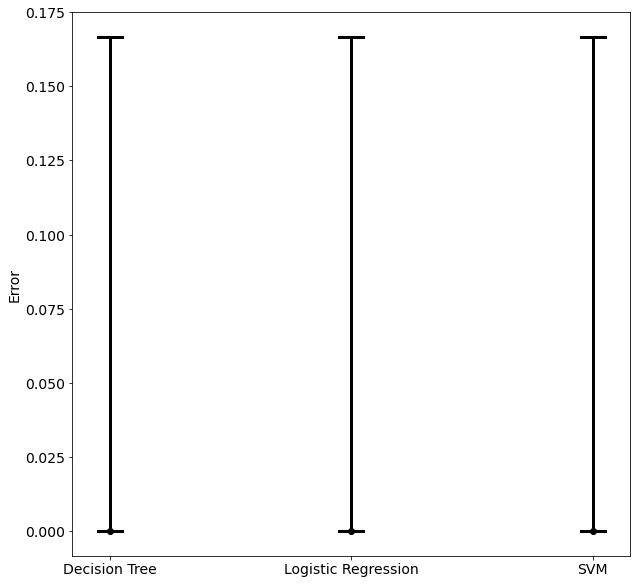

In [97]:
ci_dt = [np.percentile(errors_decision_tree, 25), np.percentile(errors_decision_tree, 75),
        np.median(errors_decision_tree)]
ci_lr = [np.percentile(errors_log_reg, 25), np.percentile(errors_log_reg, 75), np.median(errors_log_reg)]
ci_svm = [np.percentile(errors_svm, 25), np.percentile(errors_svm, 75), np.median(errors_svm)]

plt.figure(figsize=(10,10))
plt.xticks([1, 2, 3], ['Decision Tree', 'Logistic Regression', 'SVM'], fontsize=14)
plt.yticks(fontsize=14)
plot_CI(1,ci_dt)
plot_CI(2,ci_lr)
plot_CI(3,ci_svm)
plt.ylabel("Error", fontsize=14)
#plt.savefig("./Figures/Figure1-4.pdf",format="pdf")
plt.show()

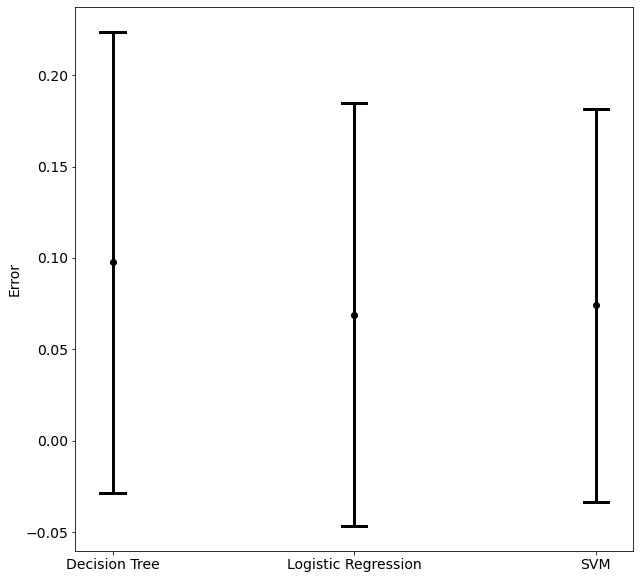

In [100]:
ci_dt = [np.mean(errors_decision_tree) - np.std(errors_decision_tree), 
         np.mean(errors_decision_tree) + np.std(errors_decision_tree),
        np.mean(errors_decision_tree)]
ci_lr = [np.mean(errors_log_reg) - np.std(errors_log_reg), 
         np.mean(errors_log_reg) + np.std(errors_log_reg),
         np.mean(errors_log_reg)]
ci_svm = [np.mean(errors_svm) - np.std(errors_svm), 
         np.mean(errors_svm) + np.std(errors_svm), np.mean(errors_svm)]

plt.figure(figsize=(10,10))
plt.xticks([1, 2, 3], ['Decision Tree', 'Logistic Regression', 'SVM'], fontsize=14)
plt.yticks(fontsize=14)
plot_CI(1,ci_dt)
plot_CI(2,ci_lr)
plot_CI(3,ci_svm)
plt.ylabel("Error", fontsize=14)
#plt.savefig("./Figures/Figure1-4.pdf",format="pdf")
plt.show()

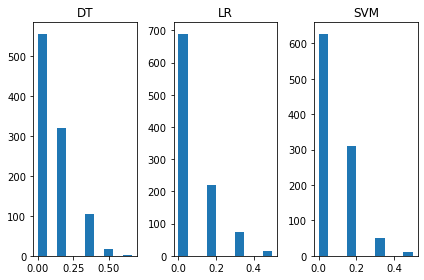

In [111]:
plt.subplot(131)
plt.hist(errors_decision_tree)
plt.title("DT")
plt.subplot(132)
plt.hist(errors_log_reg)
plt.title("LR")
plt.subplot(133)
plt.hist(errors_svm)
plt.title("SVM")

plt.tight_layout()
plt.show()

### 6.3.2 Effect Size



In [89]:
ci_dt

[0.0, 0.16666666666666666]

In [78]:
# The model metrics for this text come from the experiment in 1.3
DT_all = np.loadtxt("../../Part_I/Chapter-1-Statistics-Overview/DT_all.csv")
SVM_all = np.loadtxt("../../Part_I/Chapter-1-Statistics-Overview/SVM_all.csv")

diff = np.mean(DT_all) - np.mean(SVM_all)
var_dt = np.var(DT_all)
var_svm = np.var(SVM_all)

cohens_D = diff / (((var_dt + var_svm)/2) ** 0.5)
b

2.009648718827902

In [64]:
df = pd.DataFrame(X)
df["y"] = y
train = resample(df, replace=True, n_samples=len(df))
test = df[~df.index.isin(train.index)]
X_train = train.loc[:,0:28]
y_train = train["y"]
X_train = test.loc[:,0:28]
y_train = test["y"]

## Example: Comparing Bayesian and NHST for Two Classifiers on One Domain

#### Install the bayesian testing package

In [135]:
# pip install git+https://github.com/janezd/baycomp
# OR
# pip install baycomp 

#### Load the UCI Breast Cancer Dataset if not done prior

In [3]:
bc_link = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data"
bc_data = pd.read_csv(bc_link, header = None)
X = bc_data.iloc[:,2:33].to_numpy()
y= bc_data.iloc[:,1].to_numpy()

#### Perform 30x10 CV for Decision Tree and SVM (modify procedure from Chapter 1), not averaging by run for this example

In [76]:
from numpy.random import seed, choice
# Test size is 57
seed(42)
n_trials = 30
ind_list = []
for trial in range(n_trials):
    ind = []
    for i in range(10):
        ind.append(choice(X.shape[0] - 1, 57,replace=False))
    ind_list.append(ind)

In [86]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
import numpy as np

n_trials = 30
n_folds = 10
accuracies_dt = np.zeros((1,n_trials*n_folds))
accuracies_svm = np.zeros((1,n_trials*n_folds))
for trial in range(n_trials):
    accuracies_dt_ = np.zeros((1,n_folds))
    accuracies_svm_ = np.zeros((1,n_folds))
    for i in range(n_folds):
        test_idx = list(ind_list[trial][i])
        train_idx = list(set(test_idx) ^ set(range(X.shape[0])))
        X_test = X[test_idx,:]
        y_test = y[test_idx]
        X_train = X[train_idx,:]
        y_train = y[train_idx]
        DT = DecisionTreeClassifier()
        SV = SVC()
        predictions = DT.fit(X_train, y_train.ravel()).predict(X_test)
        accuracies_dt_[0,i] = sum(predictions == y_test.T)/len(y_test)
        predictions = SV.fit(X_train, y_train.ravel()).predict(X_test)
        accuracies_svm_[0,i] = sum(predictions == y_test.T)/len(y_test)
        
    accuracies_dt[0][trial*n_folds:trial*n_folds+n_folds] = accuracies_dt_
    accuracies_svm[0][trial*n_folds:trial*n_folds+n_folds] = accuracies_svm_
accuracies_dt = accuracies_dt[0]
accuracies_svm = accuracies_svm[0]
diff = accuracies_dt - accuracies_svm

In [87]:
diff.shape

(300,)

### Bayesian Estimation Approach

In [12]:
import baycomp as bt
import matplotlib.pyplot as plt

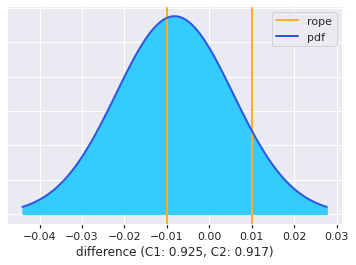

In [153]:
bayes_probs, bayes_plot = bt.two_on_single(accuracies_dt, accuracies_svm, runs=n_trials, rope = 0.01, plot=True)

### NHST Approach (Using Nadeau/Bengio's Corrected t-Test and Confidence Interval)

In [112]:
d_mu = np.mean(diff)
diff_trials = np.mean(diff.reshape((30,10)), axis=0)
t_stat = (d_mu * (float(n_trials)**0.5)) / ((1/n_trials +  len(y_test) / len(y_train))*sum((diff_trials - d_mu)**2))**0.5

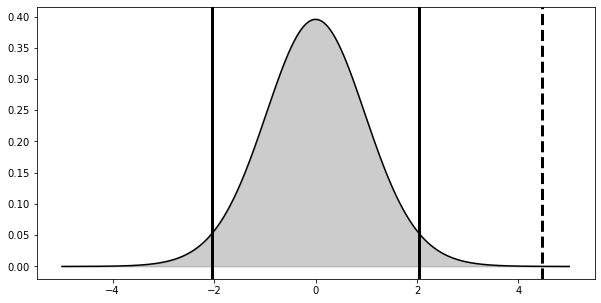

In [147]:
from scipy.stats import t
df = n_trials-1
x = np.linspace(-5,5,1000)
plt.figure(figsize=(10,5))
plt.plot(x, t.pdf(x,df), color="k")
plt.fill_between(x, t.pdf(x,df), color="k",alpha =0.2)
plt.axvline(t.ppf(q=.025, df=df), color = "k", lw = 3)
plt.axvline(t.ppf(q=.975, df=df), color = "k", lw=3)
plt.axvline(t_stat, color = "k", ls = "--", lw = 3)
plt.show()

#### Comments on the Differences in Approaches

The Bayesian Estimation approach (copied from Benavoli et al. 2017, using the same default settings for the priors) generates a posterior distribution of the difference in accuracy between the two classifiers.  The ROPE (Region of Practical Equivalence) is set at 1%, meaning that the performance difference is considered practically equivalent when its absolute value is less than 0.01.  The ROPE divides the pdf into three sections, and the areas of these sections-- from left to right-- correspond to 

1. P(A_dt < A_svm): the probability that the accuracy of the Decision Tree is **less than** that of the SVM
2. P(A_dt = A_svm): the probability that the accuracy of the Decision Tree is **equal to** that of the SVM
3. P(A_dt > A_svm): the probability that the accuracy of the Decision Tree is **more than** that of the SVM


The NHST plot, though similar in appearance to the Bayesian plot, communicates different information.  The probability density function shown is the t distribution for 29 degrees of freedom.  The null hypothesis in this case is that the true mean difference in accuracy is zero.  The t values between the solid vertical lines correspond to the 95% confidence interval within which the null cannot be rejected.  The dashed line is the value of the the corrected t-statistic (Nadeau and Bengio 2003) for this data.

(Benavoli et al. 2017) stresses that a weakness of NHST is its inability to make conclusions about the null hypothesis.  The only two outcomes of a null hypothesis significance test are failing to reject the null and rejecting the null.  However, the latter case does not allow you to conclude that the null is true nor estimate the probability that it is true.  An advantage of Bayesian estimation is the ability to assign a probability to the null hypothesis.  While Bayesian estimation is conceptually attractive for this reason among others, it depends heavily on the choice of the prior distribution.  The best prior distribution may be different for different combinations of domains and classifiers.